In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
rand = tf.random.uniform(shape = [1], minval = 0, maxval = 1)
print(rand)
print(rand.shape)
rand.shape

tf.Tensor([0.12448597], shape=(1,), dtype=float32)
(1,)


TensorShape([1])

In [4]:
rand = tf.random.uniform(shape=[4], minval=0, maxval=1)
print(rand)
print(rand.shape)
rand.shape

tf.Tensor([0.31212962 0.59076273 0.10495961 0.06976581], shape=(4,), dtype=float32)
(4,)


TensorShape([4])

In [5]:
rand = tf.random.normal(shape=[4], mean=0, stddev=1)
print(rand)
print(rand.shape)
rand.shape

tf.Tensor([-0.20605241 -0.36915633  0.779798   -0.56837094], shape=(4,), dtype=float32)
(4,)


TensorShape([4])

In [6]:
rand = tf.random.uniform(shape=[4])
print(rand)

rand = tf.random.normal(shape=[4])
print(rand)

tf.Tensor([0.28155243 0.44893074 0.19035101 0.5548701 ], shape=(4,), dtype=float32)
tf.Tensor([-1.1413664  -0.23051354  0.00144586  0.50665134], shape=(4,), dtype=float32)


In [7]:
print(rand[0])
print(rand[1])
print(rand[2])
print(rand[3])

tf.Tensor(-1.1413664, shape=(), dtype=float32)
tf.Tensor(-0.23051354, shape=(), dtype=float32)
tf.Tensor(0.0014458568, shape=(), dtype=float32)
tf.Tensor(0.50665134, shape=(), dtype=float32)


In [8]:
import tensorflow as tf

w = tf.Variable(2.0)
b = tf.Variable(0.7)

In [9]:
x = 1.5
y = w * x + b

In [10]:
print('y:', y)

y: tf.Tensor(3.7, shape=(), dtype=float32)


In [11]:
import numpy as np
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3, 5, 5, 6, 7, 7, 8, 9, 9, 10]

In [12]:
w = tf.Variable(tf.random.normal(shape=[1]))
b = tf.Variable(tf.random.normal(shape=[1]))

In [13]:
def compute_loss():
    y_pred = w * x + b
    loss = tf.reduce_mean((y - y_pred)**2)
    return loss

In [14]:
optimizer = tf.optimizers.Adam(learning_rate = 0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [w, b])

    if i % 100 == 0:
        print(i, 'loss:', compute_loss().numpy(), '\n')

print('final w:', w)
print('final b:', b)

0 loss: 627.8995 

100 loss: 0.20493197 

200 loss: 0.17007896 

300 loss: 0.1600685 

400 loss: 0.15252192 

500 loss: 0.1475531 

600 loss: 0.14463279 

700 loss: 0.14308462 

800 loss: 0.14234042 

900 loss: 0.14201531 

final w: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.7117303], dtype=float32)>
final b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.98213], dtype=float32)>


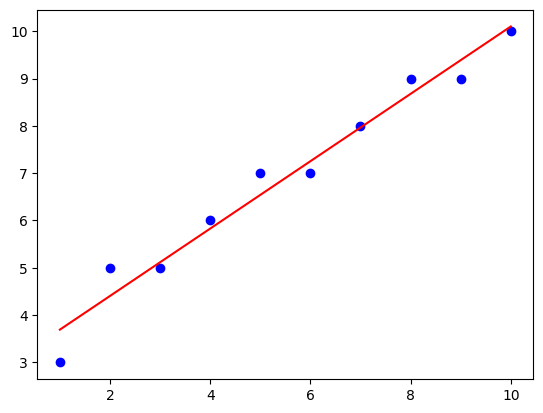

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y, 'bo')
plt.plot(x, w * x +b, 'red')
plt.show()

In [16]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3, 5, 5, 6, 7, 7, 8, 9, 9, 10]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation='tanh', input_dim=1))
model.add(tf.keras.layers.Dense(units=1))

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.07)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x,y,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 51.9297
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 36.0098
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 24.0578
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 15.5482
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 9.9183
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 6.3033
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 4.2649
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.2522
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.8224
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.7567
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.9170
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.1691
Epoch 13/1000
1/1 [===========================

In [19]:
model.predict(x)

1/1 [==============================] - 0s 97ms/step


array([[3.0149062],
       [4.7892804],
       [5.289911 ],
       [5.975338 ],
       [6.7089696],
       [7.3463745],
       [7.992598 ],
       [8.685799 ],
       [9.335733 ],
       [9.860443 ]], dtype=float32)

1/1 [==============================] - 0s 35ms/step


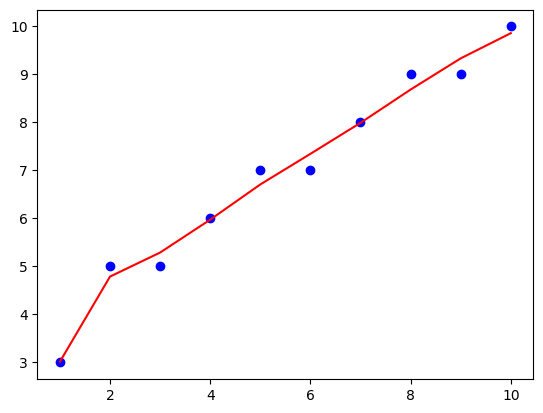

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y, 'bo')
plt.plot(x, model.predict(x), 'red')
plt.show()

In [21]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [22]:
print(test_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

In [23]:
print(type(test_images))
import numpy as np
np.set_printoptions(linewidth=np.inf)

<class 'numpy.ndarray'>


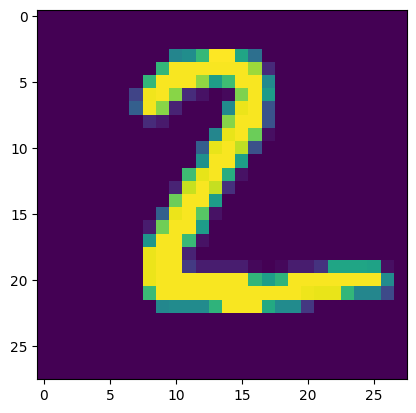

In [24]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1])

In [25]:
print(test_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [26]:
my_slice = test_images[0:100]
print(my_slice.shape)

(100, 28, 28)


In [27]:
my_slice = test_images[0:100, 0:28, 0:28]
my_slice = test_images[0:100, :, :]
print(my_slice.shape)

(100, 28, 28)


In [28]:
print(len(train_labels))
print(len(test_labels))

print(train_labels)
print(test_labels)

60000
10000
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [29]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [31]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [32]:
np.set_printoptions(linewidth=300)
print(test_images[1])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.      

In [33]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [34]:
model.fit(train_images, train_labels, epochs=5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2247 - accuracy: 0.9347
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1008 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0714 - accuracy: 0.9795
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0485 - accuracy: 0.9863


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9771
test_acc: 0.9771000146865845


In [36]:
import numpy as np
x = np.array(12)

print(x)
print(type(x))
print(x.ndim)

12
<class 'numpy.ndarray'>
0


In [37]:
x = np.array([12, 3, 6, 14, 7])

print(x)
print(type(x))
print(x.ndim)

[12  3  6 14  7]
<class 'numpy.ndarray'>
1


In [38]:
x = np.array([[12, 3, 6, 14, 7], [10, 5, 8, 13, 8], [11, 6, 7, 12, 7]])

print(x)
print(type(x))
print(x.ndim)

[[12  3  6 14  7]
 [10  5  8 13  8]
 [11  6  7 12  7]]
<class 'numpy.ndarray'>
2


In [39]:
x = np.array([[[12, 3, 6, 14, 7],
[10, 5, 8, 13, 8],
[11, 6, 7, 12, 7]],
[[12, 3, 6, 14, 7],
[10, 5, 8, 13, 8],
[11, 6, 7, 12, 7]],
[[12, 3, 6, 14, 7],
[10, 5, 8, 13, 8],
[11, 6, 7, 12, 7]]])

print(x)
print(type(x))
print(x.ndim)

[[[12  3  6 14  7]
  [10  5  8 13  8]
  [11  6  7 12  7]]

 [[12  3  6 14  7]
  [10  5  8 13  8]
  [11  6  7 12  7]]

 [[12  3  6 14  7]
  [10  5  8 13  8]
  [11  6  7 12  7]]]
<class 'numpy.ndarray'>
3


In [40]:
x = np.array([[[[12, 3, 6, 14, 7],
[10, 5, 8, 13, 8],
[11, 6, 7, 12, 7]],
[[12, 3, 6, 14, 7],
[10, 5, 8, 13, 8],
[11, 6, 7, 12, 7]],
[[12, 3, 6, 14, 7],
[10, 5, 8, 13, 8],
[11, 6, 7, 12, 7]]],
[[[12, 3, 6, 14, 7],
[10, 5, 8, 13, 8],
[11, 6, 7, 12, 7]],
[[12, 3, 6, 14, 7],
[10, 5, 8, 13, 8],
[11, 6, 7, 12, 7]],
[[12, 3, 6, 14, 7],
[10, 5, 8, 13, 8],
[11, 6, 7, 12, 7]]]])

print(x)
print(type(x))
print(x.ndim)
print(x.shape)

[[[[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]]


 [[[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]

  [[12  3  6 14  7]
   [10  5  8 13  8]
   [11  6  7 12  7]]]]
<class 'numpy.ndarray'>
4
(2, 3, 3, 5)


In [41]:
import pandas as pd

df = pd.read_csv('C:/pytest/BostonHousing.csv', delim_whitespace=False, header=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


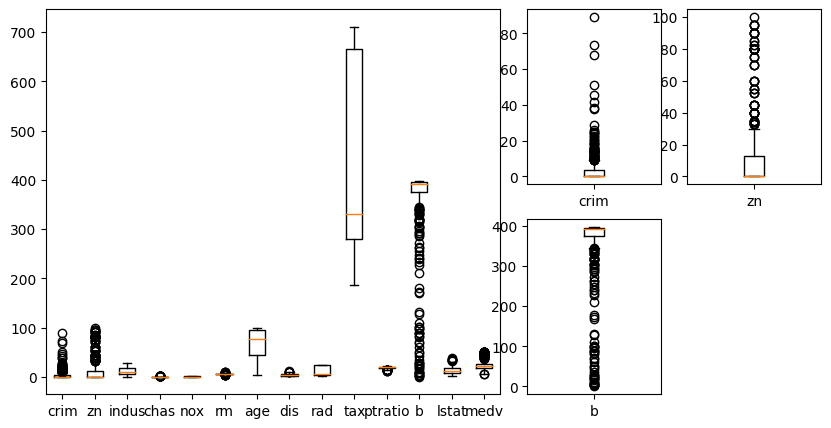

In [43]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=5)
ax0 = fig.add_subplot(gs[:, 0:3])
ax1 = fig.add_subplot(gs[0, 3])
ax2 = fig.add_subplot(gs[0, 4])
ax3 = fig.add_subplot(gs[1, 3])

ax0.boxplot(df, labels = df.columns)
ax1.boxplot(df.crim, labels = ['crim'])
ax2.boxplot(df.zn, labels = ['zn'])
ax3.boxplot(df.b, labels = ['b'])

plt.show()

In [44]:
X = df.iloc[:, :13]
y = df.iloc[:, 13]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, activation='relu', input_dim = 13))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                420       
                                                                 
 dense_5 (Dense)             (None, 16)                496       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='mse', optimizer = 'adam')
history = model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
38/38 [==============================] - 0s 3ms/step - loss: 522.1395
Epoch 2/200
38/38 [==============================] - 0s 3ms/step - loss: 74.9887
Epoch 3/200
38/38 [==============================] - 0s 3ms/step - loss: 62.7964
Epoch 4/200
38/38 [==============================] - 0s 3ms/step - loss: 58.9927
Epoch 5/200
38/38 [==============================] - 0s 3ms/step - loss: 54.5389
Epoch 6/200
38/38 [==============================] - 0s 3ms/step - loss: 54.4198
Epoch 7/200
38/38 [==============================] - 0s 3ms/step - loss: 56.4367
Epoch 8/200
38/38 [==============================] - 0s 3ms/step - loss: 51.0184
Epoch 9/200
38/38 [==============================] - 0s 3ms/step - loss: 48.0029
Epoch 10/200
38/38 [==============================] - 0s 2ms/step - loss: 45.3199
Epoch 11/200
38/38 [==============================] - 0s 3ms/step - loss: 48.1844
Epoch 12/200
38/38 [==============================] - 0s 3ms/step - loss: 43.9782
Epoch 13/200
38/38 [====

4/4 [==============================] - 0s 2ms/step


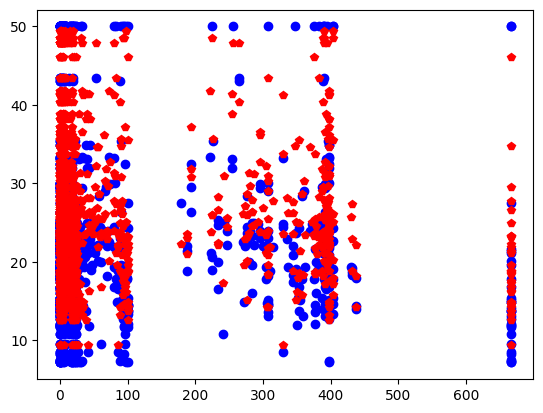

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_test , y_test, 'bo')
plt.plot(X_test, model.predict(X_test), 'p', color = 'red')
plt.show()

In [49]:
model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


array([[27.852564],
       [26.023884],
       [25.052   ],
       [26.319157],
       [19.618927],
       [41.27753 ],
       [14.262904],
       [28.171581],
       [23.29533 ],
       [34.809563],
       [22.205357],
       [48.49772 ],
       [17.220701],
       [25.0807  ],
       [18.49247 ],
       [25.453157],
       [25.395462],
       [27.437643],
       [17.337593],
       [23.694237],
       [30.3619  ],
       [21.108149],
       [23.355705],
       [18.877247],
       [22.93016 ],
       [14.862478],
       [18.79668 ],
       [14.328929],
       [26.585009],
       [23.607985],
       [15.211375],
       [33.739944],
       [18.495008],
       [22.162102],
       [23.948793],
       [30.986511],
       [34.609924],
       [25.009268],
       [16.293003],
       [30.77684 ],
       [16.144886],
       [25.575825],
       [20.177616],
       [29.635235],
       [36.50338 ],
       [37.20997 ],
       [47.869198],
       [22.306   ],
       [18.26132 ],
       [ 9.391205],


In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

4/4 [==============================] - 0s 2ms/step
5.458114421130154


In [51]:
import pandas as pd

df = pd.read_csv('C:/pytest/pima-indians-diabetes.csv', header = 0)
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df = df.sample(frac = 1)
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
129,0,105,84,0,0,27.9,0.741,62,1
329,6,105,70,32,68,30.8,0.122,37,0
462,8,74,70,40,49,35.3,0.705,39,0
391,5,166,76,0,0,45.7,0.340,27,1
43,9,171,110,24,240,45.4,0.721,54,1


In [53]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age    diabetes  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

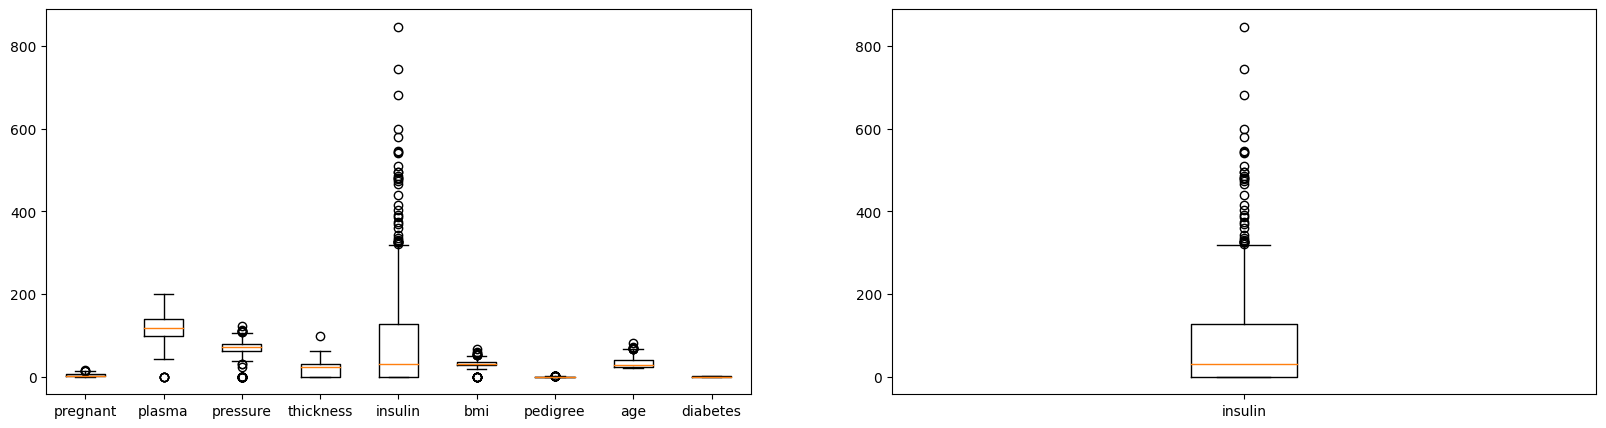

In [54]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.boxplot(df, labels = df.columns)
ax1.boxplot(df.insulin, labels = ['insulin'])
plt.show()

In [55]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.head())
print('*'*12)
print(X_test.head())

     pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age
515         3     163        70         18      105  31.6     0.268   28
407         0     101        62          0        0  21.9     0.336   25
343         5     122        86          0        0  34.7     0.290   33
281        10     129        76         28      122  35.9     0.280   39
351         4     137        84          0        0  31.2     0.252   30
************
     pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age
743         9     140        94          0        0  32.7     0.734   45
446         1     100        72         12       70  25.3     0.658   28
0           6     148        72         35        0  33.6     0.627   50
420         1     119        88         41      170  45.3     0.507   26
334         1      95        60         18       58  23.9     0.260   22


In [57]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=12, activation='relu', input_dim=8))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                108       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999999 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.50371647],
       [1.        ],
       [1.        ],
       [0.9999999 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999046],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999999 ],
       [0.9999994 ],
       [1.        ],
       [0.99999976],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999999 ],
       [1.        ],
       [0.999998  ],
       [1.        ],
       [1.        ],
       [1.   

In [60]:
model.predict(X_test)[0]

6/6 [==============================] - 0s 2ms/step


array([1.], dtype=float32)

6/6 [==============================] - 0s 1ms/step


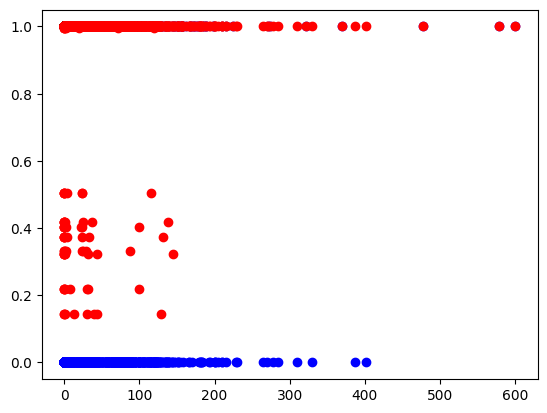

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, model.predict(X_test), 'ro')
plt.show()

In [62]:
prediction = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [63]:
prediction2 = []
for i in range(len(prediction)):
    if prediction[i] > 0.5:
        prediction2.append(1)

    else:
        prediction2.append(0)

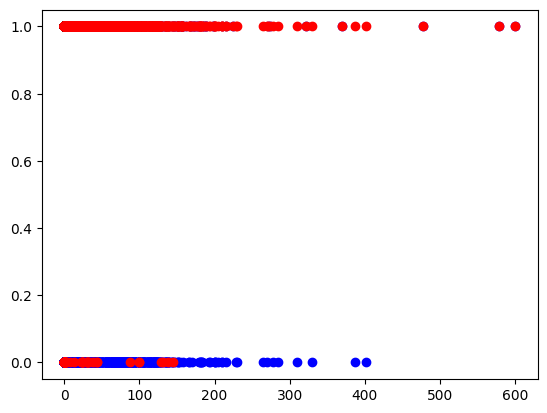

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, prediction2, 'ro')
plt.show()

In [65]:
import os
temp_model_path = 'C:/pytest/temp/model'

if os.path.exists(temp_model_path):
    print('{} -- Folder already exists \n'.format(temp_model_path))
else:
    os.makedirs(temp_model_path, exist_ok=True)
    print('{} -- Folder create complete \n'.format(temp_model_path))

C:/pytest/temp/model -- Folder create complete 



In [66]:
import os
os.chdir(temp_model_path)

In [67]:
model.save('pima-indians-diabetes.h5')

In [68]:
from tensorflow.keras.models import load_model
loaded_model = load_model('pima-indians-diabetes.h5')

In [69]:
loaded_model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999999 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.50371647],
       [1.        ],
       [1.        ],
       [0.9999999 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999046],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999999 ],
       [0.9999994 ],
       [1.        ],
       [0.99999976],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999999 ],
       [1.        ],
       [0.999998  ],
       [1.        ],
       [1.        ],
       [1.   

In [70]:
new_data = {'pregnant':[6], 'plasma':[105], 'pressure':[80], 'thickness':[28],
'insulin':[0], 'BMI':[32.5], 'pedigree':[0.878], 'age':[26]}
new_data = pd.DataFrame(new_data)
print(new_data)

loaded_model.predict(new_data)

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age
0         6     105        80         28        0  32.5     0.878   26
1/1 [==============================] - 0s 53ms/step


array([[1.]], dtype=float32)